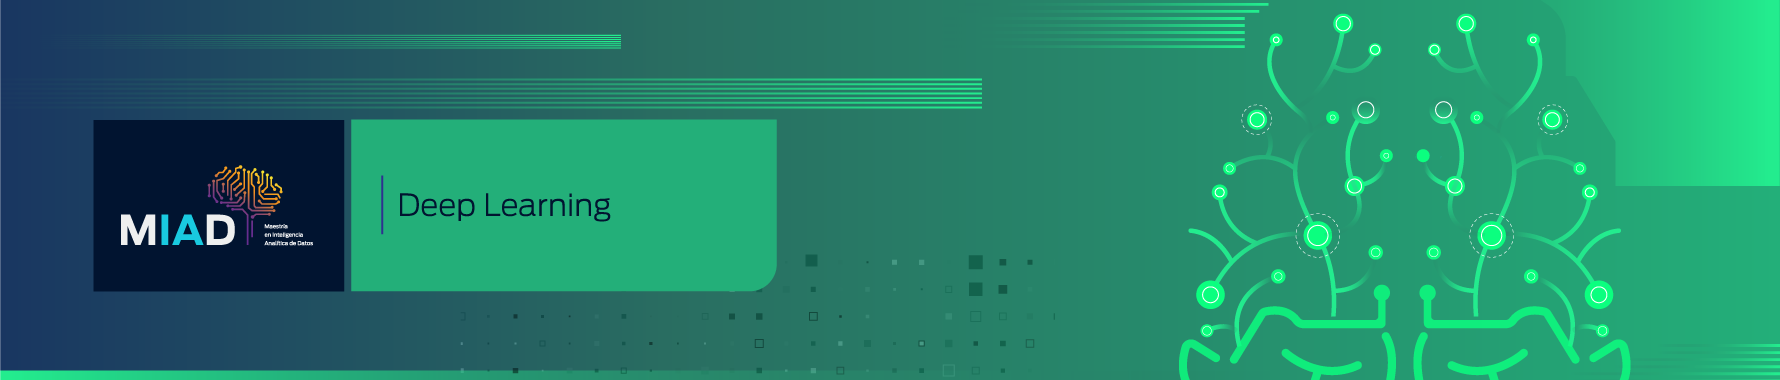

# Deep learning - Semana 5
## Implementación de _Forward Propagation_ en Redes Neuronales Convolucionales

### Propósito

En esta actividad se definirá una red convolucional y se implementarán los pasos necesarios para hacer una iteración de _forward propagation_ del algoritmo de estimación, en donde se deben implementar correctamente todos los filtros de convolución, _pooling_ y las capas completamente conectadas.

### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. 

2. En las partes iniciales, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

3. La última sección corresponde a una actividad evaluable con calificación automática.

### Librerías a importar

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

## Definición de la red convolucional a implementar

El objetivo es implementar una red convolucional con las siguientes características:

1. El input es una imagen en blanco y negro (arreglo matricial) de $p\times q$

2. La primera transformación se hace con un operador de convolución a través de un filtro de $f\times f$. Además se usa _padding_ de tamaño $pd$ y strides de tamaño $s$.

3. La segunda transformación corresponde a una operación de _pooling_ con operador máximo y de tamaño $f_p\times f_p$ y stride de $s_p$.

4. La siguiente transformación es una capa _fully connected_, con número de nodos $mf$.

5. Por último, se une con el nodo de salida usando una función de activación tipo $softmax$ para predecir la probabilidad correspondiente de cada clase.

A continuación, se presenta un gráfica de la red correspondiente:

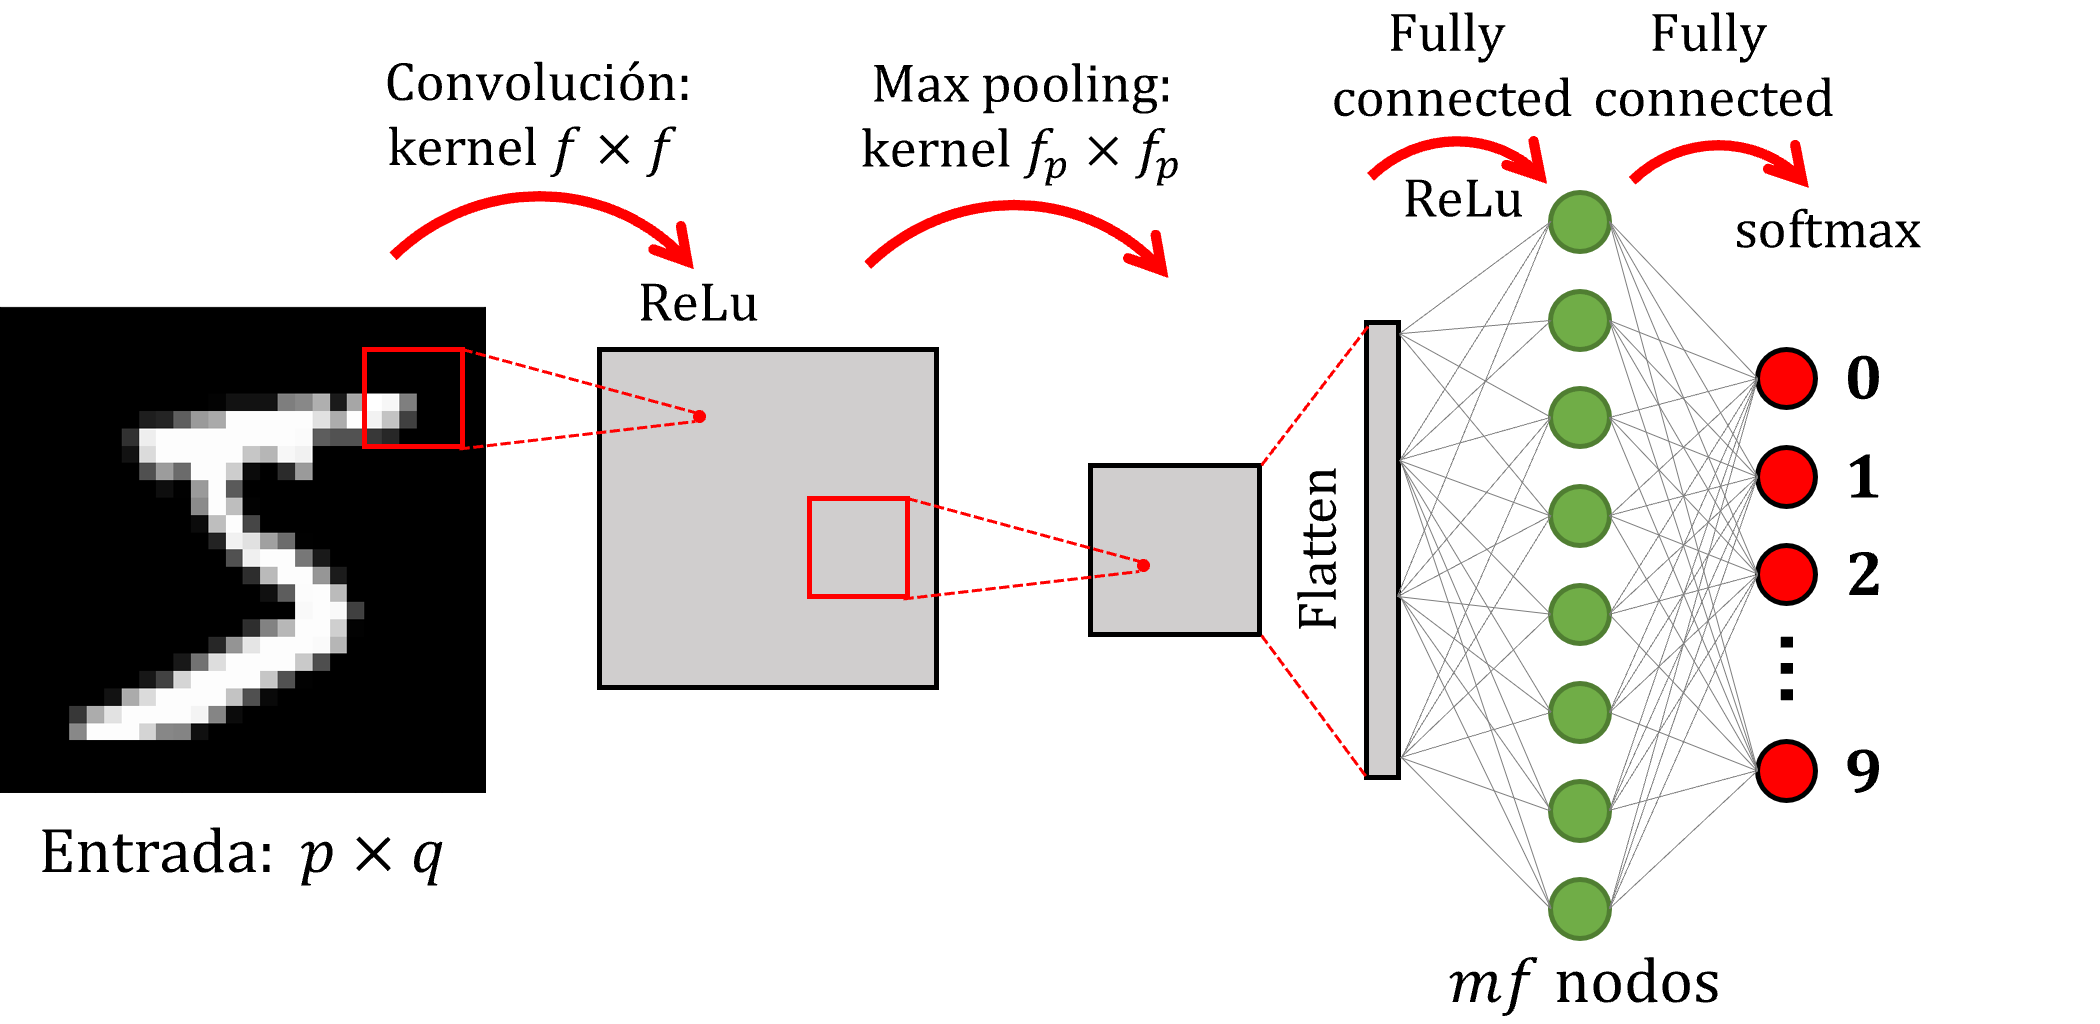

### A. Implementación de funciones

Par implementar la red, se definirán las funciones con las cuales se logran las transformaciones entre las capas. Las funciones a desarrollar son:

1. Función de `padding`: Crea una imagen aumentada con relleno (_padding_) de tamaño $pd$. **Entrada**: arreglo $p\times p$ (imagen) y parámetro $pd$. **Salida**: Imagen aumentada en los bordes.
2. Función `convol`: Hace la operación de convolución. **Entrada**: arreglo $p\times p$ (imagen), parámetro $pd$ (_padding_), arreglo de filtro de tamaño $f\times f$, intercepto (parámetro de sesgo - $b_1$), tamaño de paso (_stride_ - $s$). **Salida**: Arreglo de la convolución con las dimensiones correspondientes después de usar una función de activación tipo $ReLu$.
3. Función `pool`: Realiza la operación de _pooling_. **Entrada**: Arreglo en dos dimensiones de la operación anterior, tamaño de filtro ($f_p$) y stride ($s_p$). **Salida**: Arreglo en dos dimensiones con los tamaños correspondientes.
4. Función `fully`: Transforma el arreglo de la operación anterior a uno lineal de tamaño $mf$. **Entrada**: Arreglo de capa anterior, matriz de parámetros de transformación ($W_2$), vector de sesgos ($b_2$). **Salida**: vector con la transformación requerida de longitud $mf$, después de usar funciones de activación tipo $ReLu$.
5. Función `output`: Calcula la probabilidad estimada final. **Entrada**: vector de la capa anterior _fully connected_, parámetros de transformación ($W_3$), sesgo ($b_3$).  **Salida**: Probabilidad estimada usando función de activación **softmax**.



#### 1. Función _padding_

En este caso, es posible usar la función `Pad` de `NumPy` para crear los bordes de la matriz.

In [2]:
def padding(X, pd):
    padd=np.pad(X, pad_width=pd)
    return (padd)

A continuación, probaremos la función de padding con una matriz $4 \times 4$:

In [3]:
#Prueba de funcionamiento
#1. Arreglo de enteros
arr = np.arange(16).reshape(4, 4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


El resultado de un padding de tamaño $pd=2$ sería:

In [4]:
arrpad1=padding(arr,2)
print(arrpad1)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  3  0  0]
 [ 0  0  4  5  6  7  0  0]
 [ 0  0  8  9 10 11  0  0]
 [ 0  0 12 13 14 15  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


Note que se agregaron las filas y columnas correspondientes. Probemos ahora con una matriz de números aleatorios:

In [5]:
arr=np.random.rand(3,3)
arrpad2=padding(arr,1)
print(arrpad2)

[[0.         0.         0.         0.         0.        ]
 [0.         0.56533808 0.97889768 0.74733325 0.        ]
 [0.         0.76774941 0.41994831 0.72075643 0.        ]
 [0.         0.74774821 0.36226355 0.92974386 0.        ]
 [0.         0.         0.         0.         0.        ]]


#### 2. Función _convol_

En este punto, adapte la función que contruyó en el anterior laboratorio sumativo ("Experimentando con Padding y Strides") que también utiliza la función de padding construida anteriormente y realice la operación convolución con strides determinados, con el objetivo de incluir un intercepto ($b_1$) y la función de activación ReLu

In [6]:
def convol(image, pd, filt, s, b1):
    # your code here
    # Dimensiones del filtro
    f_x, f_y = filt.shape

    # Padding a la imagen
    image_padded = padding(image, pd)

    # Dimensiones de la imagen con padding
    img_x, img_y = image_padded.shape

    # Cálculo de dimensiones de salida usando la fórmula
    out_x = ((img_x - f_x) // s) + 1
    out_y = ((img_y - f_y) // s) + 1

    # Inicializar salida
    output = np.zeros((out_x, out_y))

    # Aplicar convolución con strides
    i_out = 0
    for i in range(0, img_x - f_x + 1, s):
        j_out = 0
        for j in range(0, img_y - f_y + 1, s):
            region = image_padded[i:i+f_x, j:j+f_y]
            conv = np.sum(region * filt) + b1
            # Activación ReLU integrada aquí
            output[i_out, j_out] = max(0, conv)
            j_out += 1
        i_out += 1

    #raise NotImplementedError
    return output

Probemos una convolución sobre la matriz/imagen $X$:

In [7]:
X=np.array([25,100,75,49,130,
            50,80,0,70,100,
            5,10,20,30,0,
            60,50,12,24,32,
            37,53,55,21,90,
            140,17,0,23,22
            ]).reshape((6,5))
X

array([[ 25, 100,  75,  49, 130],
       [ 50,  80,   0,  70, 100],
       [  5,  10,  20,  30,   0],
       [ 60,  50,  12,  24,  32],
       [ 37,  53,  55,  21,  90],
       [140,  17,   0,  23,  22]])

Y la matriz de convolución `filt` y los demás parámetros indicados abajo:

In [8]:
filt=np.array([1,0,1,
               0,1,0,
               0,0,1]).reshape((3,3))
pd=0
b1=0
s=1

convol(X, pd, filt, s, b1)

array([[200., 179., 275.],
       [ 72., 194., 162.],
       [130.,  73., 134.],
       [125., 152.,  87.]])

Debería obtener el siguiente resultado:
\begin{array}{cc}
200 & 179 & 275 \\
72  & 194 & 162 \\
130 & 73  & 134 \\
125 & 152 & 87 
\end{array}

A continuación puede visualizar una prueba con números aleatorios:

In [9]:
#Prueba de funcionamiento convol

#1. Imagen de números aleatorios
X=np.random.rand(5,5)
filt=np.array([0,1,0,
               0,1,0,
               0,1,0]).reshape((3,3))
pd=1
b1=0
s=1

convol(X, pd, filt, s, b1)

array([[1.28796307, 1.53475558, 1.92585103, 0.77565742, 0.13454423],
       [1.4417976 , 1.82856929, 2.34136152, 0.79702047, 1.00460922],
       [1.76558823, 1.79775245, 1.97309976, 1.33467424, 1.16380628],
       [1.58895706, 1.07645483, 1.11660805, 1.34136121, 1.26705045],
       [1.43512253, 0.78264112, 0.70109757, 1.31999816, 0.39698546]])


#### 3. Función _pool_:

En este caso, deberá escribir la función para hacer _pooling_ con operador de máximo. Escriba su código en la siguiente celda:

In [10]:
# input es el arreglo en dos dimensiones que entra de la capa anterior (generalmente convolución)
# fp es el tamaño del filtro (cuadrado)
# sp es la longitud de paso (stride) del pooling
def pool(input,fp,sp):
    # your code here
    in_x, in_y = input.shape

    # Cálculo de dimensiones de salida
    out_x = ((in_x - fp) // sp) + 1
    out_y = ((in_y - fp) // sp) + 1

    # Inicializar la matriz de salida
    filtered = np.zeros((out_x, out_y))

    # Aplicar max pooling
    i_out = 0
    for i in range(0, in_x - fp + 1, sp):
        j_out = 0
        for j in range(0, in_y - fp + 1, sp):
            region = input[i:i+fp, j:j+fp]
            filtered[i_out, j_out] = np.max(region)
            j_out += 1
        i_out += 1

    #raise NotImplementedError
    return filtered

Pruebe su código con la siguiente matriz de entrada:

\begin{array}{cc}
5 & 2 & 0  & 7 \\
1 & 9 & 8  & 4 \\
5 & 2 & 1  & 4 \\
9 & 6 & 3  & 2 
\end{array}

Con operador máximo, tamaño de filtro 2 y _stride_ 2, para la cual, la salida debe ser:

\begin{array}{cc}
9 & 8  \\
9 & 4 \\
\end{array}


In [11]:
X=np.array([5,2,0,7,
            1,9,8,4,
            5,2,1,4,
            9,6,3,2]).reshape((4,4))
pool(X,2,2)

array([[9., 8.],
       [9., 4.]])

#### 4. Función _fully_:

Esta función debe tomar los nodos de entrada en un arreglo de dos dimensiones, ponerlos en un arreglo lineal (poniendo un columna debajo de la anterior), y transformarlos a través de una matriz de pesos $W_2$ y un vector sesgos $b_2$, a un arreglo lineal de salida de tamaño  $mf$ (número de nodo en la capa). Por último, se debe implementar una función de activación tipo $ReLu$.

In [60]:
# X es el arreglo en dos dimensiones que entra de la capa anterior
# W2 es la matriz de pesos
# b2 es el vector de sesgos

def fully(X, W2, b2):    
    # your code here
    # Función ReLU definida dentro de fully
    def relu(x):
        return np.maximum(0, x)

    # Aplanar X (como fila)
    X_flat = X.flatten().reshape(1, -1)  # shape: (1, N_input)

    # Producto matricial + sesgo
    Z2 = np.dot(X_flat, W2) + b2         # (1, N_input) · (N_input, mf) → (1, mf)

    # Aplicar ReLU
    A2 = relu(Z2)


    #raise NotImplementedError
    return A2

En la siguiente prueba de funcionamiento se recibe una matriz $4\times 4$ y se debe recibir un arreglo lineal de tamaño $mf=20$:
\begin{array}{cc}
0 & 0.14333 & 0 & 0.09571 & 0.03383 & 0 & 0 & 0.03050 & 0.15597 & 0 & 0 & 0 & 0.03343 & 0.23926 & 0.33079 & 0.28594 & 0 & 0 & 0 & 0
\end{array}

In [61]:
#Prueba de funcionamiento
np.random.seed(69) 
X=np.array([5,2,0,7,1,9,8,4,5,2,1,4,9,6,3,2]).reshape((4,4))
W2=np.random.randn(16, 20)*0.01
b2=0
fully(X,W2,b2)

array([[0.        , 0.14333305, 0.        , 0.09571065, 0.03383457,
        0.        , 0.        , 0.03050296, 0.15597874, 0.        ,
        0.        , 0.        , 0.03343163, 0.2392637 , 0.33079908,
        0.28594951, 0.        , 0.        , 0.        , 0.        ]])

#### 5. Función _output_:

Esta función transforma el resultado anterior a través de una matriz de pesos $W_3$ y un vector sesgos $b_3$, a un arreglo lineal de salida con las clases del problema. En este caso son 10 clases, sobre las cuales se debe implementar una función de activación tipo **softmax**.


In [62]:
# X es el arreglo en dos dimensiones que entra de la capa anterior (generalmente convolución)
# W3 es el vector con los pesos correspondientes para calcular el output antes de la función softmax
# b3 es el sesgo correspondiente
def output(X,W3,b3):
    # your code here
    # Transformación lineal: Z3 = X · W3 + b3
    Z3 = np.dot(X, W3) + b3  # X debe ser de tamaño (1, mf) y W3 de (mf, 10), resultado (1, 10)

    # Aplicar softmax
    expZ = np.exp(Z3 - np.max(Z3))  # estabilidad numérica
    probs = expZ / np.sum(expZ)

    #raise NotImplementedError
    return probs

En la siguiente prueba de funcionamiento se recibe un arreglo lineal de tamaño $mf=20$ y se deben recibir las probabilidades para cada clase:
\begin{array}{cc}
0.09374172 & 0.09402206 & 0.13272758 & 0.1135229 & 0.09221424 & 0.10773818 & 0.08660547 & 0.08332976 & 0.10190703 & 0.09419106
\end{array}

In [63]:
#Prueba de funcionamiento
np.random.seed(69) 
X=np.array([1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0,3.0,2.0])
W3=np.random.randn(20, 10)*0.01
b3=0
output(X,W3,b3)

array([0.09374172, 0.09402206, 0.13272758, 0.1135229 , 0.09221424,
       0.10773818, 0.08660547, 0.08332976, 0.10190703, 0.09419106])

### B. Implementación _forward propagation_ en Red Convolucional

Par implementar la red, se definirán las funciones con las cuales se logran las transformaciones entre las capas. Las funciones a desarrollar incluyen la inicialización de los parámetros de la red y la aplicación del _forward propagation_ utilizando las funciones implementadas previamente por usted:

In [44]:
def inicializacion(X,output_unit,filt_size,pd,s,fp,sp,mf):
    np.random.seed(69) 
    filt = np.random.randn(filt_size,filt_size)*np.sqrt(1/filt_size)
    ImgDim_x = X.shape[0]
    ImgDim_y = X.shape[1]
    convolOutput_x = int(((ImgDim_x + 2*pd - filt_size) / s) + 1)
    convolOutput_y = int(((ImgDim_y + 2*pd - filt_size) / s) + 1)
    poolOutput_x = int(((convolOutput_x - fp) / sp) + 1)
    poolOutput_y = int(((convolOutput_y - fp) / sp) + 1)
    W2 = np.random.randn(poolOutput_x*poolOutput_y, mf)/np.sqrt(poolOutput_x*poolOutput_y)
    b2 = np.zeros((1, mf))
    W3 = np.random.randn(mf, output_unit)/np.sqrt(mf)
    b3 = np.zeros((1, output_unit))
    parameters = {"filt": filt,
                  "convol_dim": (convolOutput_x,convolOutput_y),
                  "pool_dim": (poolOutput_x,poolOutput_y),
                  "W2":   W2,
                  "b2":   b2,
                  "W3":   W3,
                  "b3":   b3}
    return parameters

In [45]:
def forward_propagation(X,parameters,pd,s,fp,sp,b1):
    #Se cargan los valores de los parámetros
    filt = parameters['filt'] #Matriz de convolución
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    #Se ejecuta la convolución con los parámetros establecidos
    convol_result=convol(X,pd,filt,s,b1)
    #Se ejecuta la Max Pooling con los parámetros establecidos
    pool_result=pool(convol_result,fp,sp)
    #Se ejecuta el flatten y la capa totalmente conectada
    A2 = fully(pool_result, W2, b2)
    #Se ejecuta el cálculo del vector de probabilidades multiclase
    probs = output(A2,W3,b3)
    cache = {"Convolution":convol_result,"Pooling":pool_result,"A2": A2,"probs": probs}
    
    return probs, cache

### C. Evaluación

Para evaluar la implementación del _forward propagation_ utilizaremos la base de datos de dígitos manuscritos de MNIST disponibles en el paquete `tensorflow-keras`:

In [35]:
#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de tensorflow
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print ('X Train dimensiones: ', x_train.shape)
print ('Y Train dimensiones: ', y_train.shape)
print ('X Test dimensiones: ', x_test.shape)
print ('Y Test dimensiones: ', y_test.shape)

X Train dimensiones:  (60000, 28, 28)
Y Train dimensiones:  (60000,)
X Test dimensiones:  (10000, 28, 28)
Y Test dimensiones:  (10000,)


Esta base de datos consiste de imágenes de $28\times 28$ pixeles y se busca predecir el dígito manuscrito (0 a 9). A continuación, un ejemplo:

5

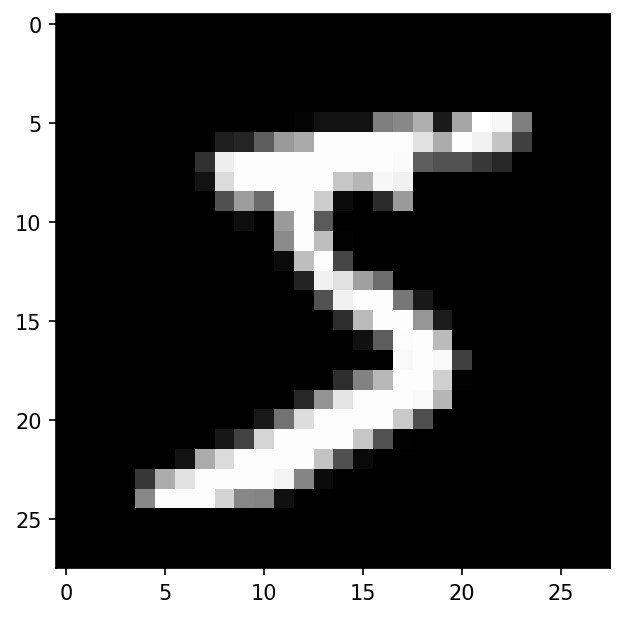

In [46]:
plt.figure(dpi=150)
#Para mostrar la imagen correctamente utilizando matplotlib, se deben reorganizar los canales de OpenCV de BGR a RGB.
import cv2
plt.imshow(cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB))
y_train[0]

In [64]:
params = inicializacion(X=x_train[0],output_unit=10,filt_size=5,pd=2,s=1,fp=2,sp=2,mf=50)
probs1, cache1 = forward_propagation(X=x_train[0],parameters=params,pd=2,s=1,fp=2,sp=2,b1=0)

In [65]:
assert round(np.linalg.norm(cache1['Convolution']),1)==round(1904.827910858361,1)
assert round(np.linalg.norm(cache1['Pooling']),1)==round(1348.782164653388,1)
assert round(np.linalg.norm(cache1['A2']),1)==round(432.9584465726889,1)
assert probs1.argmax()==6

In [ ]:
#Pruebas ocultas para uso del equipo docente

_Nota_: En estas pruebas sólo se están verificando los cálculos de _forward propagation_ en una red neuronal convolucional básica. Este es el primer paso sin ejecutar _backward propagation_, por lo que no estamos entrenando la red todavía. Por esta razón, es bastante probable que la clase predicha no corresponda con la de la imagen, pues estamos usando valores aleatorios de la inicialización de parámetros. En un laboratorio posterior realizaremos el entrenamiento de una CNN utilizando Keras y Tensorflow.